# Student Adaptability in Online Education 

#### Online education. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

<h1><center>Clustering Algorithm</center></h1>

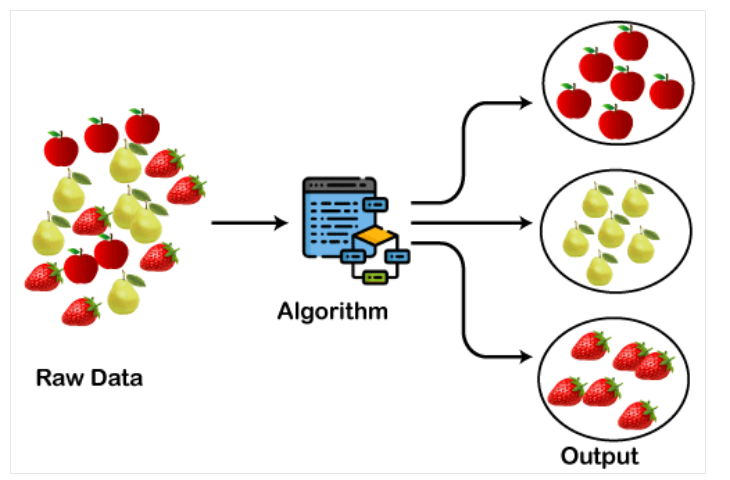


https://static.javatpoint.com/tutorial/machine-learning/images/clustering-in-machine-learning.png

# EDA 

    
    

In [2]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [3]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

# Distribution of the Dataset 



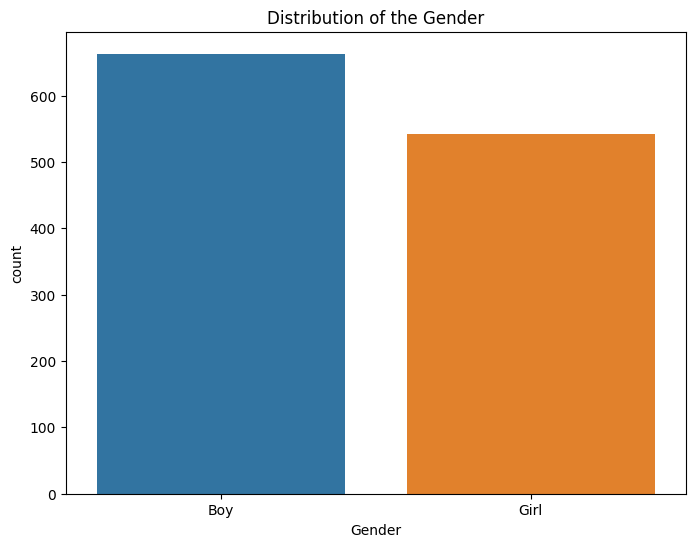

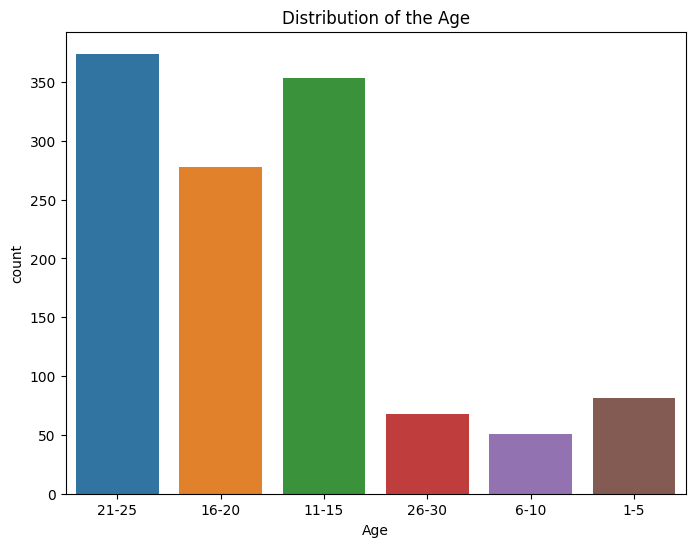

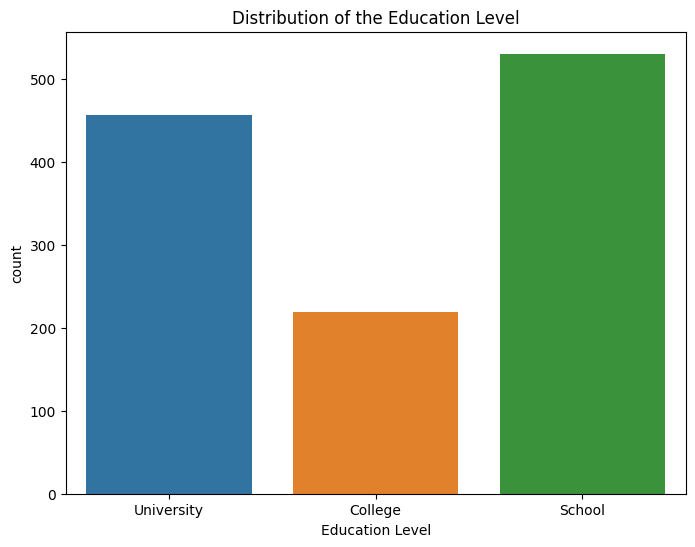

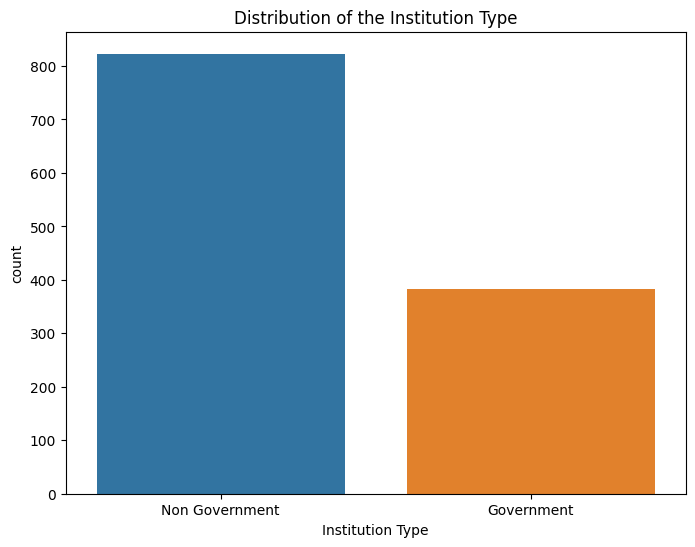

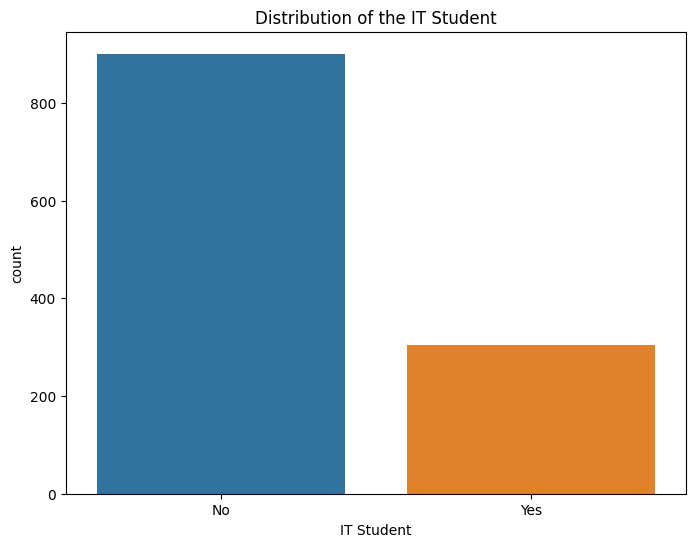

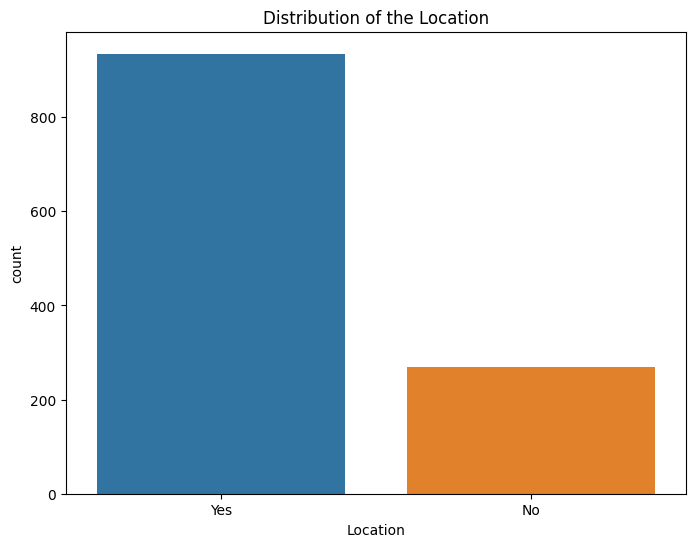

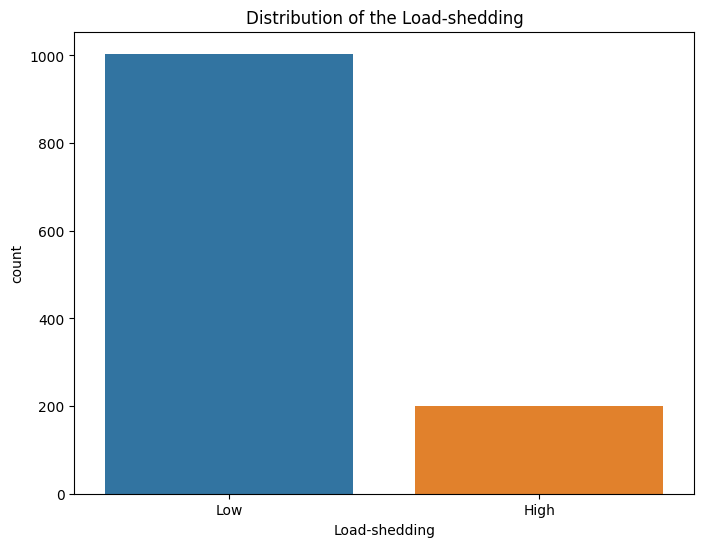

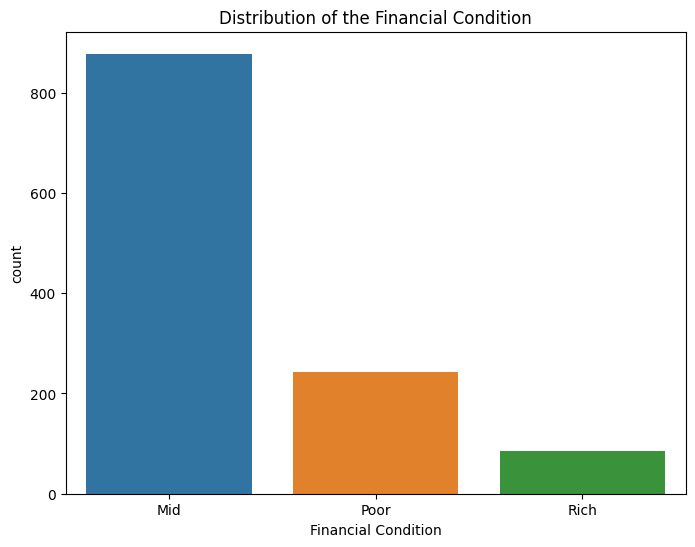

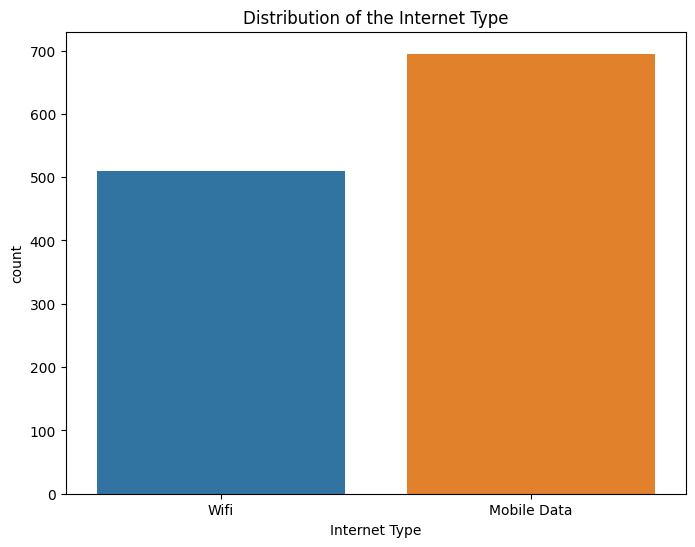

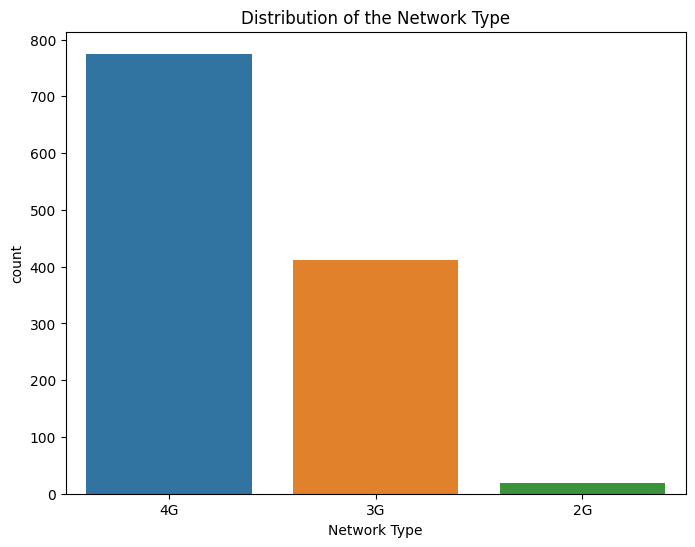

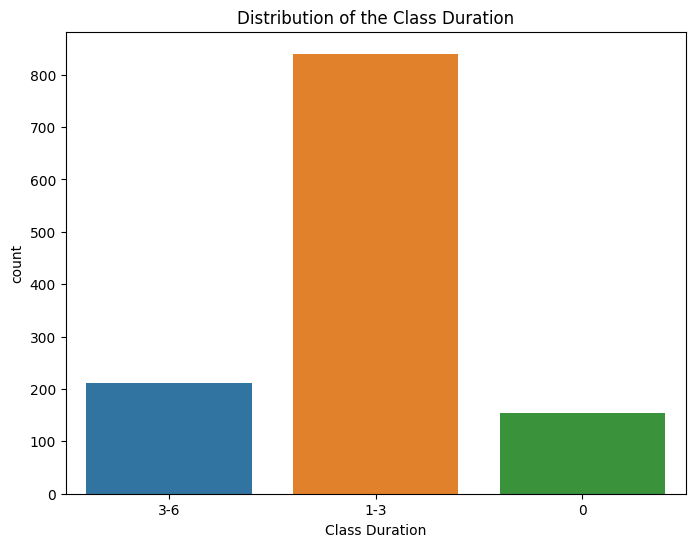

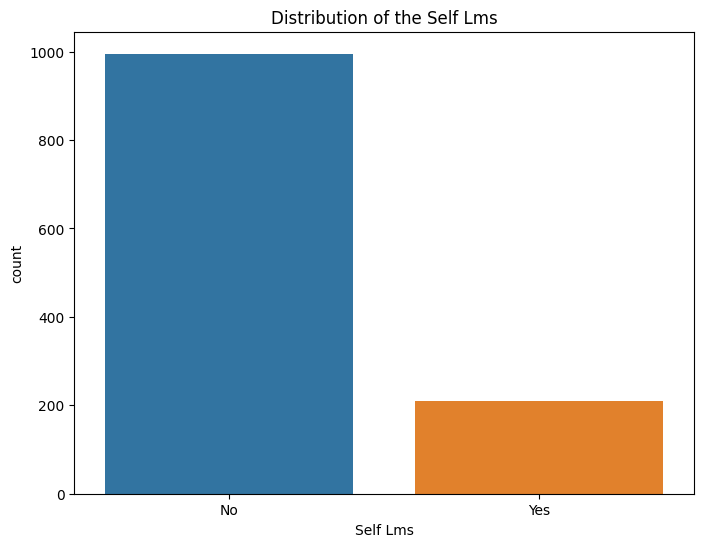

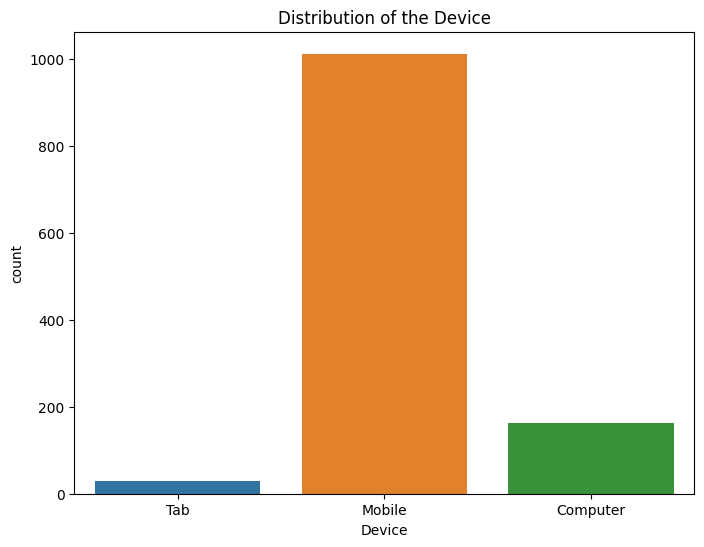

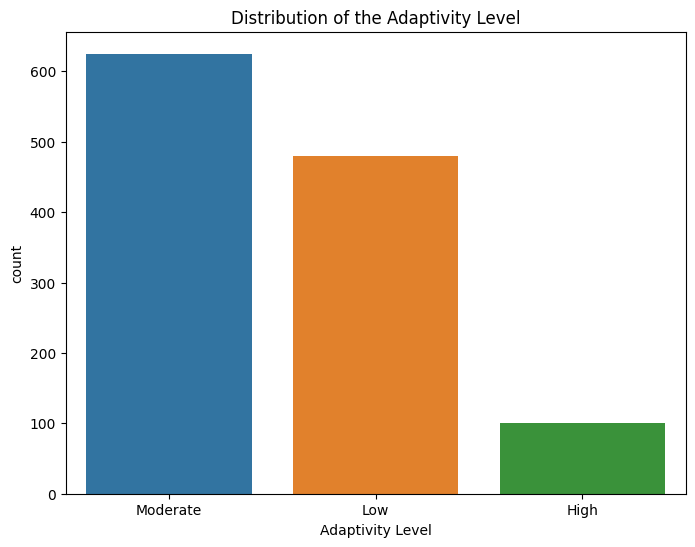

In [6]:
for col in df.columns:
    plt.figure(figsize=(8,6))
    if df[col].dtype == 'object': 
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of the {col}')
    else: 
        df[col].plot(kind='hist', title=f'Distribution of the {col}', bins=10)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

####  There is no null value it means that we do not need to deal with it.

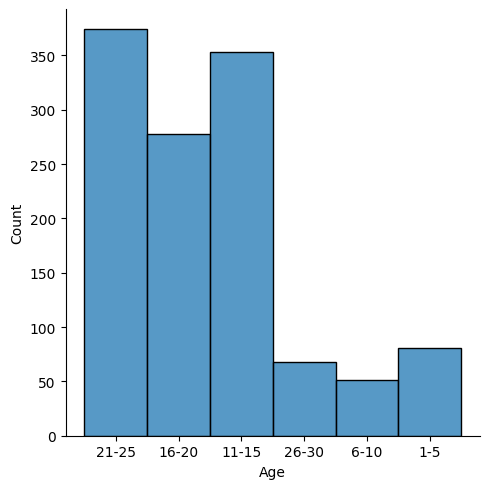

In [7]:
sns.displot(df, x='Age');


In [8]:
# We can visualize in this plot the range between age 

## The the data consist of mostly object. 

##### as we can see using df.info there are some features which should be int an example of that is Age, however, the feature age is a range, let's visualize the fist line, the range of age in the fist line is between 21 and 25, one way to handle it, it is creating a function which will change the values using the followed logic. 

###### 0 to 18 = 0 , 18 to 30 = 1 and so on. 



In [9]:
def maping_age_range(age_range):
    if age_range == '1-5':
        return 0
    elif age_range == '6-10':
        return 1
    elif age_range == '11-15':
        return 2
    elif age_range == '16-20':
        return 3
    elif age_range == '21-25':
        return 4
    elif age_range == '26-30':
        return 5
    else:
        return np.nan 

In [10]:
df['Age'] = df['Age'].apply(maping_age_range)

### In order to continue our analysis and apply machine learning we need to deal with the features that are Object we have already done it with Age creating a function that transform the range between numbers to numeric Let's plot it and see how it looks like.  



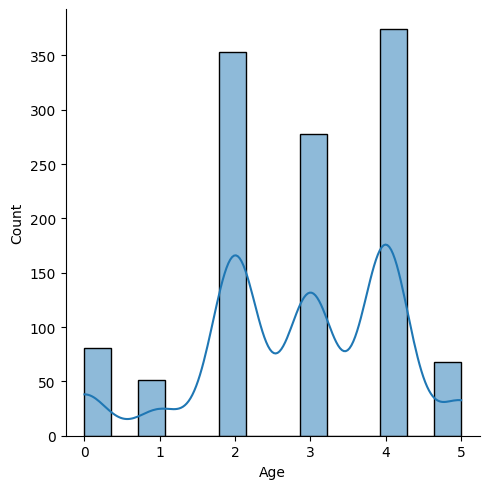

In [11]:
sns.displot(data=df, x='Age', kde='True');


# When I decided to work with this Dataset the first question that came to my mind was: 
#### However, before we continue our process lets apply Label enconding on Education Level. 

1. Is there any relation between Education Level and Social Class. 

In [12]:
df['Education Level'].unique()

array(['University', 'College', 'School'], dtype=object)

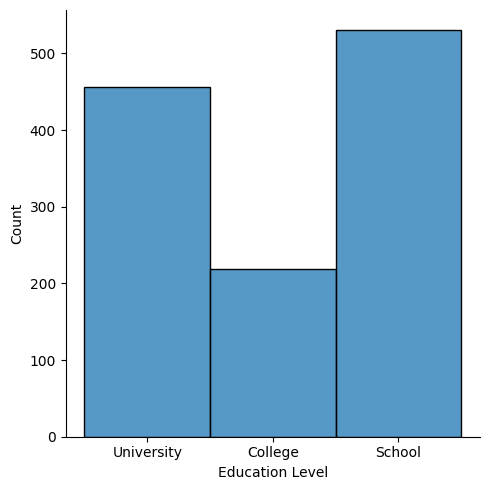

In [13]:
sns.displot(df, x='Education Level')

In [14]:
df[ 'Adaptivity Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

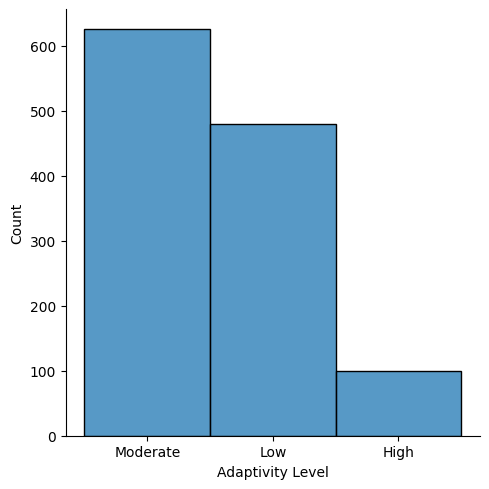

In [15]:
sns.displot(df, x='Adaptivity Level')

In [16]:
from sklearn.preprocessing import LabelEncoder


cat_col = [col for col in df.columns if df[col].dtype == 'object']


label_encoder = LabelEncoder()


# In order to continue the process I will create a loop to apply Label Encoder in all my features but Age


In [17]:
coluns_categorical = [col for col in df.columns if df[col].dtype == 'object']
for col in coluns_categorical: 
    if col != 'Age': 
        df[col] = label_encoder.fit_transform(df[col])

In [18]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,4,2,1,0,1,1,0,1,2,2,0,2,2
1,1,4,2,1,0,1,0,0,0,2,1,1,1,2
2,1,3,0,0,0,1,1,0,1,2,1,0,1,2
3,1,2,1,1,0,1,1,0,0,2,1,0,1,2
4,1,3,1,1,0,1,1,1,0,1,0,0,1,1


# Scaling the Data

In [19]:
import numpy as np 

#!pip install scikit-learn
#!pip install scipy

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df_scaler = StandardScaler()

df_scaler = df_scaler.fit_transform(df)


# Applying K_means Clustering 

# Applying Hierarchical Clustering 

<h3> Reason</h3>

<p> Our dataset is composed of categorical data and K-means Clustering is not the best option to a Dataset like this, the best option that we have is 
</p> 
- Hierarchical Clustering 
- DBSCAN 
- K-Modes 
- Mean-shift Clustering 


Let's apply Hierarchical Clustering and see the results. 


In [28]:
df_scaler.shape

(1205, 14)

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [37]:
compl_clust = linkage(df_scaler, method="complete", metric="euclidean")
avg_clust = linkage(df_scaler, method="average", metric="euclidean")
sing_clust = linkage(df_scaler, method="single", metric="euclidean")

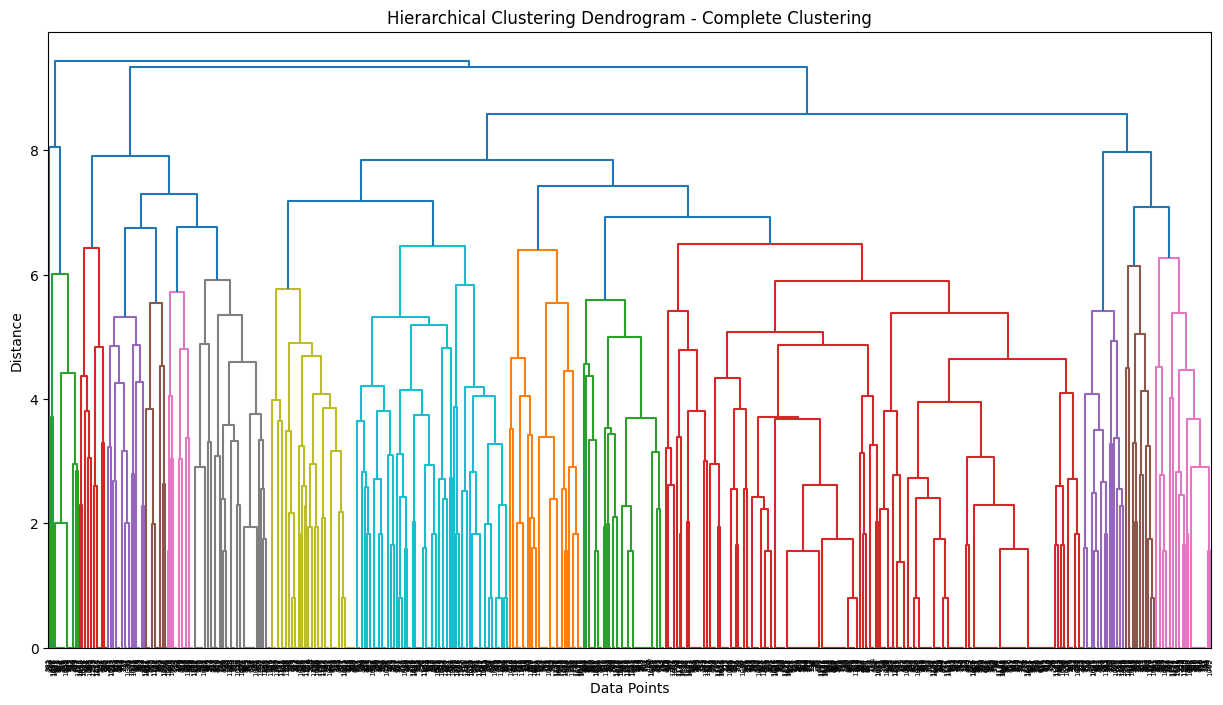

In [38]:
dendrogram(compl_clust)
plt.title('Hierarchical Clustering Dendrogram - Complete Clustering')
plt.rcParams['figure.figsize'] = [15, 8]
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

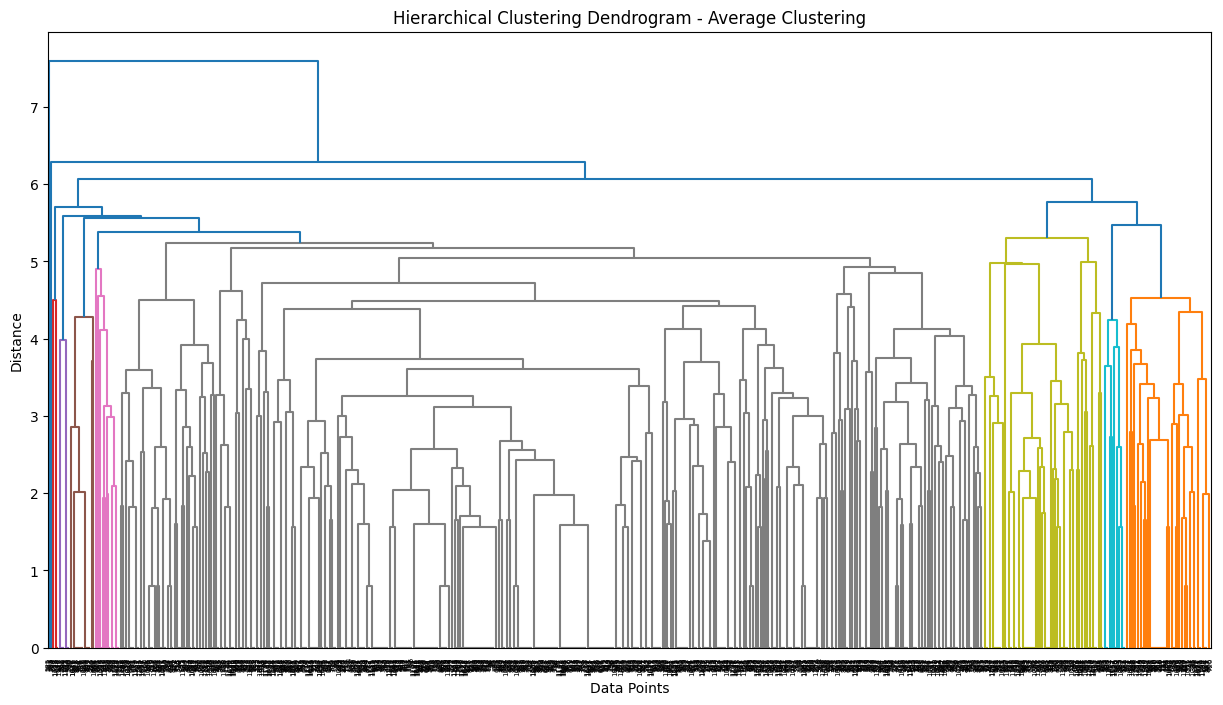

In [39]:
dendrogram(avg_clust)
plt.title('Hierarchical Clustering Dendrogram - Average Clustering')
plt.rcParams['figure.figsize'] = [15, 8]
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

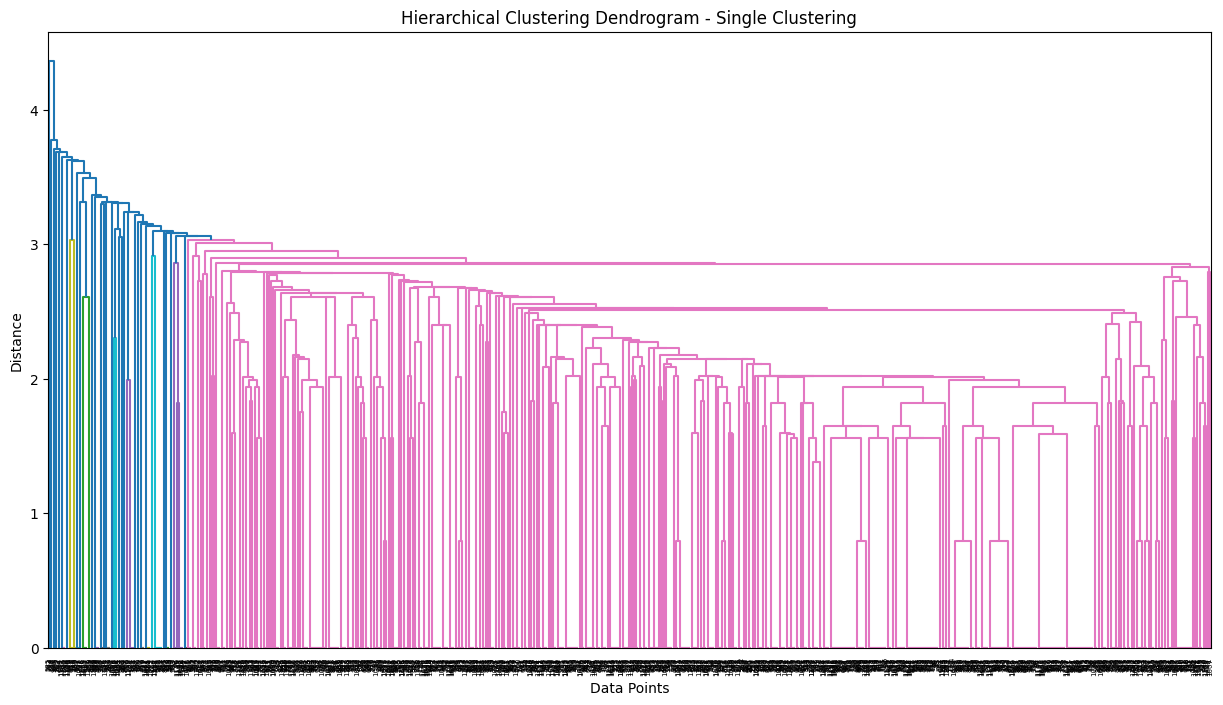

In [40]:
dendrogram(sing_clust)
plt.title('Hierarchical Clustering Dendrogram - Single Clustering')
plt.rcParams['figure.figsize'] = [15, 8]
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [50]:
max_1 = 1  # Maximum distance between clusters
clusters_df = fcluster(compl_clust, max_1, criterion='distance')

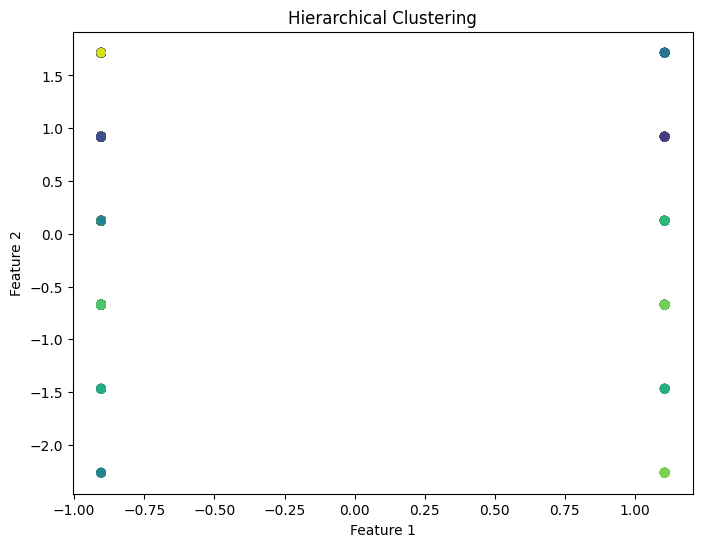

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaler[:, 0], df_scaler[:, 1], c=clusters_df, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()